## Import Libraries

In [2]:
import os
import pandas as pd

import psycopg2

## Connect to the DB

In [3]:
# information used to create a database connection
sqluser = 'postgres'
dbname = 'mimic4'
hostname = 'localhost'
port_number = 5434
schema_name = 'omop_cdm'

# Connect to postgres with a copy of the MIMIC-III database
con = psycopg2.connect(dbname=dbname, user=sqluser, host=hostname, port=port_number, password='mysecretpassword')

# the below statement is prepended to queries to ensure they select from the right schema
query_schema = 'set search_path to ' + schema_name + ';'

## Static data

In [4]:
staticQuery = """select * from sepsis_icd.static;"""
staticDf = pd.read_sql_query(staticQuery, con)
staticDf

,person_id,visit_start_datetime,visit_end_datetime,visit_occurrence_id,visit_occurrence_concept_name,visit_duration_hrs,visit_source_concept_name,admitting_source_value
0,-45407753,2128-08-16 20:08:00,2128-09-01 12:25:00,1661230940,Emergency Room - Hospital,376.0,DIRECT EMER.,PHYSICIAN REFERRAL
1,-688080236,2119-04-27 07:15:00,2119-05-02 15:45:00,-930244224,Ambulatory Surgical Center,128.0,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL
2,586098445,2143-02-19 07:15:00,2143-03-02 13:50:00,-166442621,Ambulatory Surgical Center,270.0,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL
3,-2090043093,2157-07-22 07:15:00,2157-07-23 14:55:00,-980240395,Ambulatory Surgical Center,31.0,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL
4,-1802428568,2119-07-26 07:15:00,2119-07-29 15:40:00,-1963238015,Ambulatory Surgical Center,80.0,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL
...,...,...,...,...,...,...,...,...
38079,514388861,2188-07-14 15:56:00,2188-07-20 18:16:00,1940413172,Emergency Room - Hospital,146.0,DIRECT EMER.,PHYSICIAN REFERRAL
38080,-2046241961,2190-05-07 15:25:00,2190-05-19 15:29:00,-2009187990,Emergency Room - Hospital,288.0,DIRECT EMER.,CLINIC REFERRAL
38081,-1763850806,2188-06-14 12:24:00,2188-06-26 15:00:00,1360871926,Emergency Room - Hospital,290.0,DIRECT EMER.,CLINIC REFERRAL
38082,-1833810949,2111-06-08 17:22:00,2111-06-22 02:25:00,2130536448,Emergency Room - Hospital,321.0,DIRECT EMER.,PHYSICIAN REFERRAL


<AxesSubplot:>

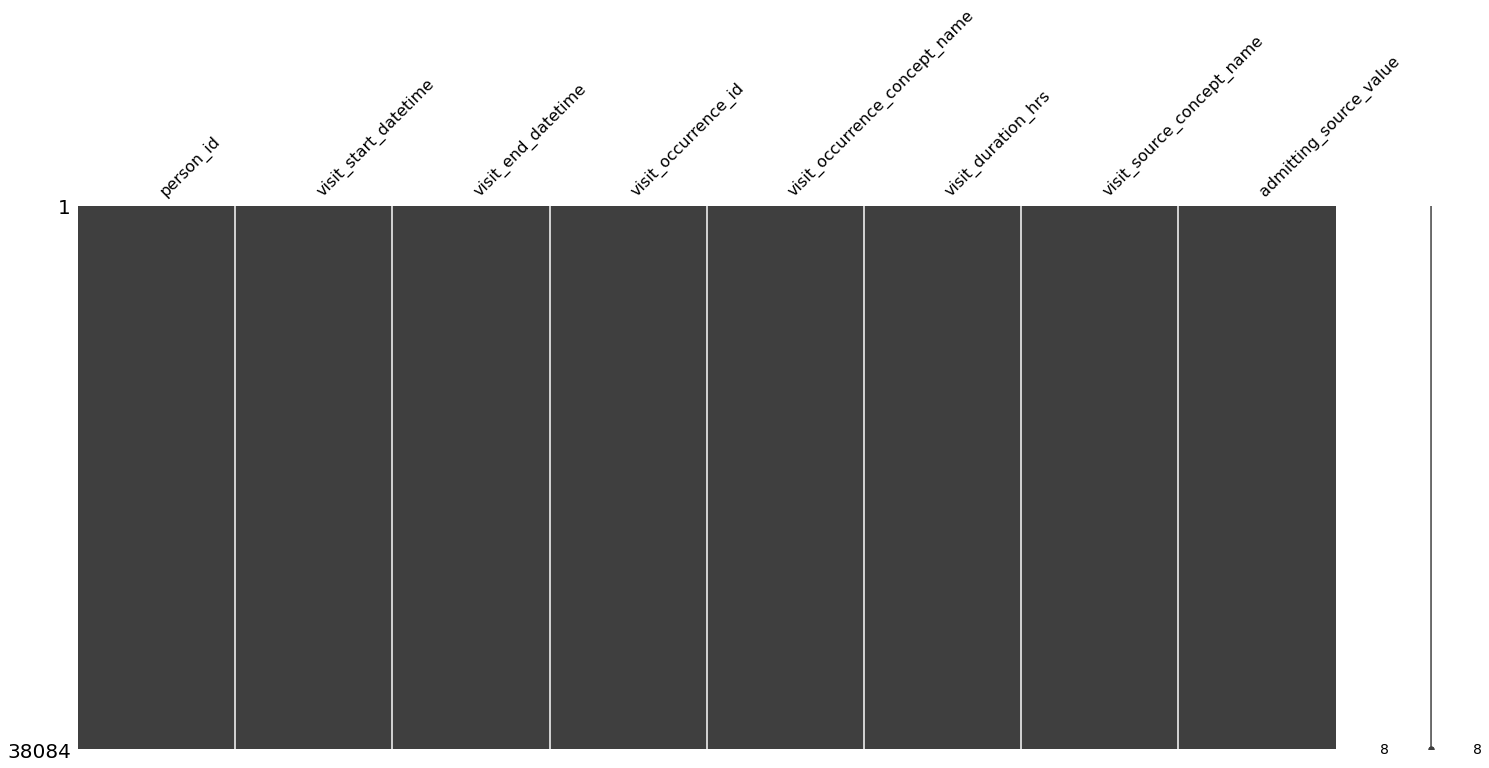

In [5]:
import missingno as msno

msno.matrix(staticDf)

<AxesSubplot:>

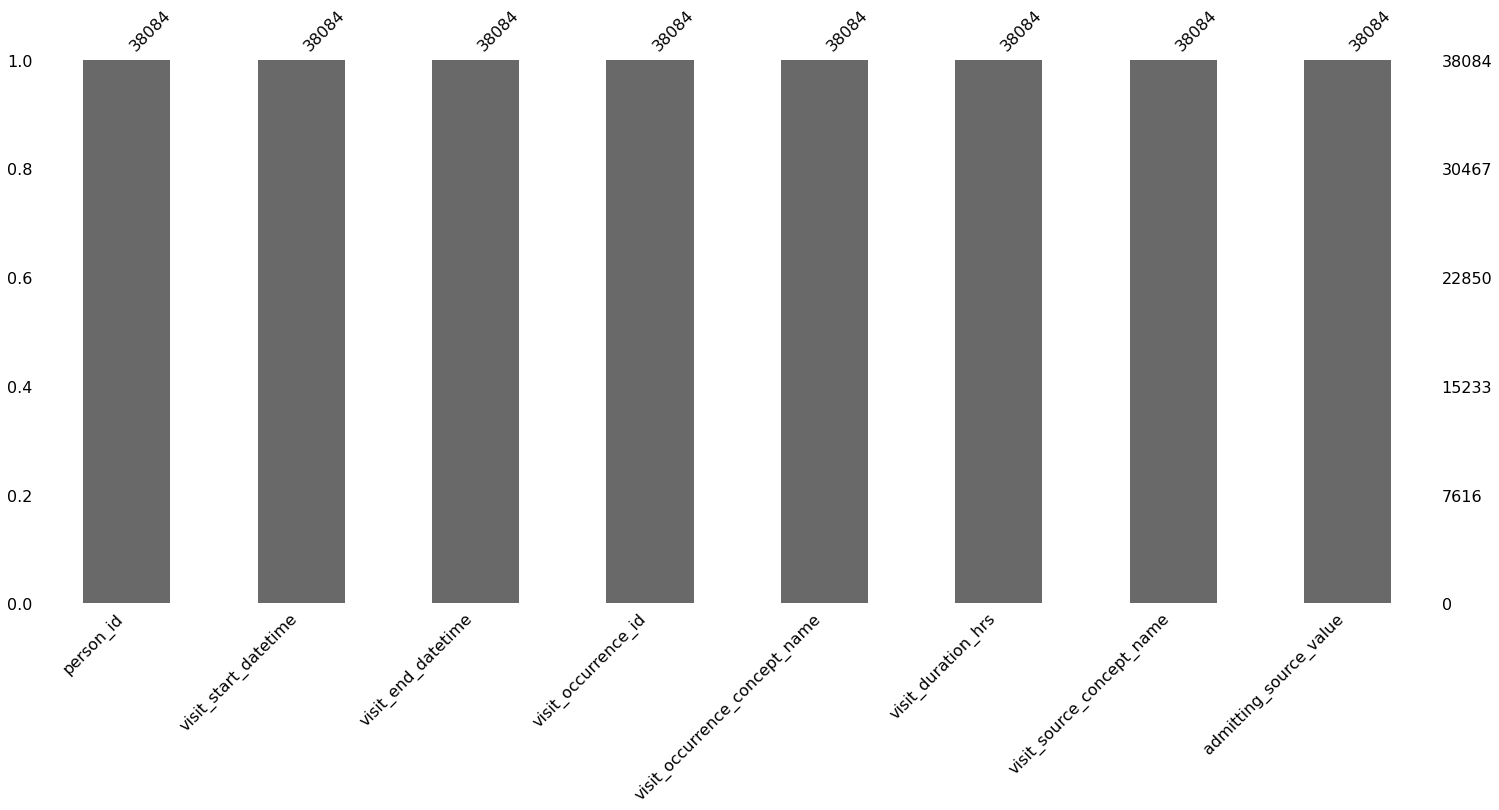

In [6]:
import missingno as msno

msno.bar(staticDf)

## Vitals data

### Read data

In [7]:
vitalsQuery = """select * from sepsis_icd.vitals;"""
vitalsDf = pd.read_sql_query(vitalsQuery, con)
vitalsDf

,visit_occurrence_id,person_id,measurement_datetime,unit_source_value,value_as_number,concept_name,rn
0,-914415209,-2146573171,2141-09-15 19:31:00,°F,97.6,Body temperature,1
1,-914415209,-2146573171,2141-09-16 00:00:00,°F,98.3,Body temperature,2
2,-914415209,-2146573171,2141-09-16 04:00:00,°F,97.6,Body temperature,3
3,-914415209,-2146573171,2141-09-16 08:00:00,°F,99.3,Body temperature,4
4,-914415209,-2146573171,2141-09-16 12:00:00,°F,100.1,Body temperature,5
...,...,...,...,...,...,...,...
23214903,741509696,2147343185,2113-08-23 13:01:00,mmHg,127.0,Systolic blood pressure by Noninvasive,98
23214904,741509696,2147343185,2113-08-23 14:01:00,mmHg,124.0,Systolic blood pressure by Noninvasive,99
23214905,741509696,2147343185,2113-08-23 14:01:00,mmHg,124.0,Systolic blood pressure by Noninvasive,100
23214906,741509696,2147343185,2113-08-23 15:01:00,mmHg,116.0,Systolic blood pressure by Noninvasive,101


### Missing data

<AxesSubplot:>

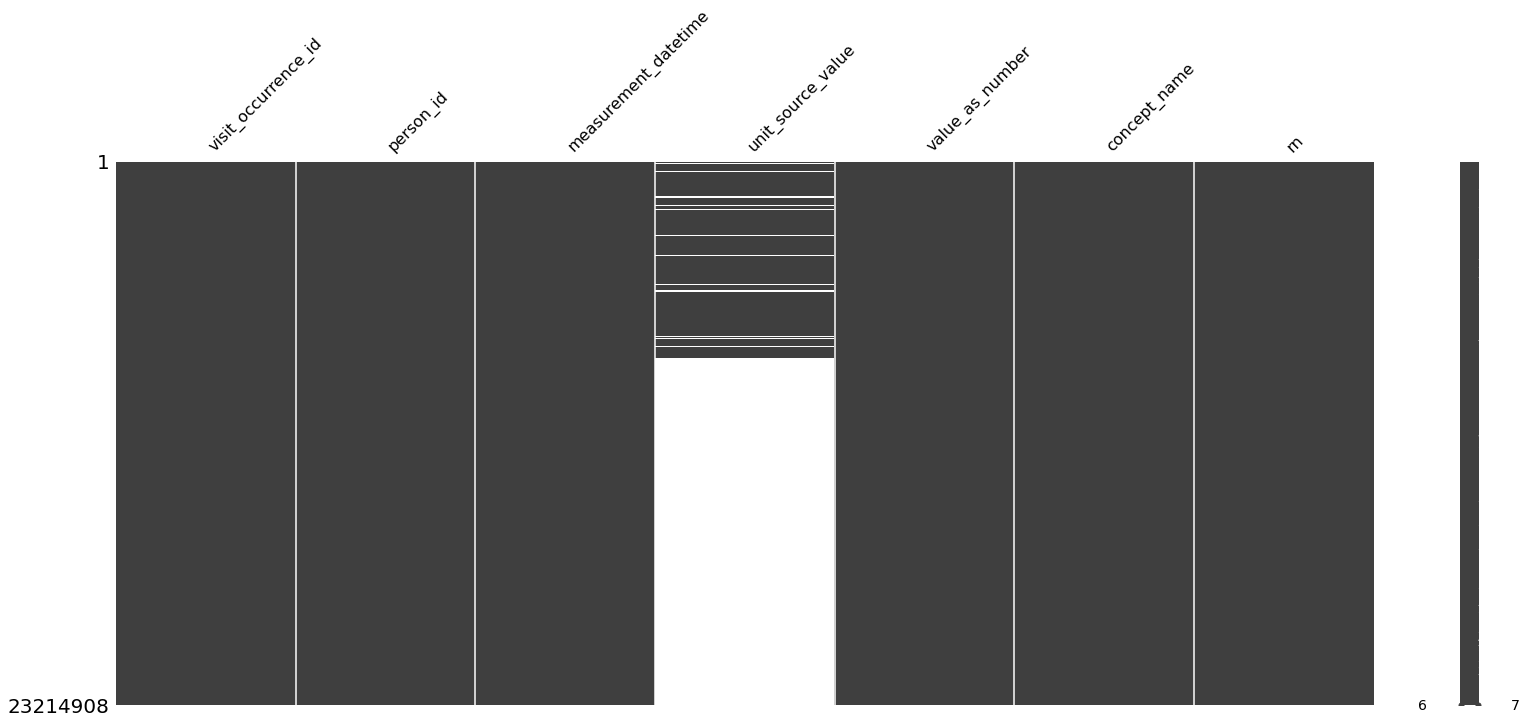

In [8]:
import missingno as msno

msno.matrix(vitalsDf)

<AxesSubplot:>

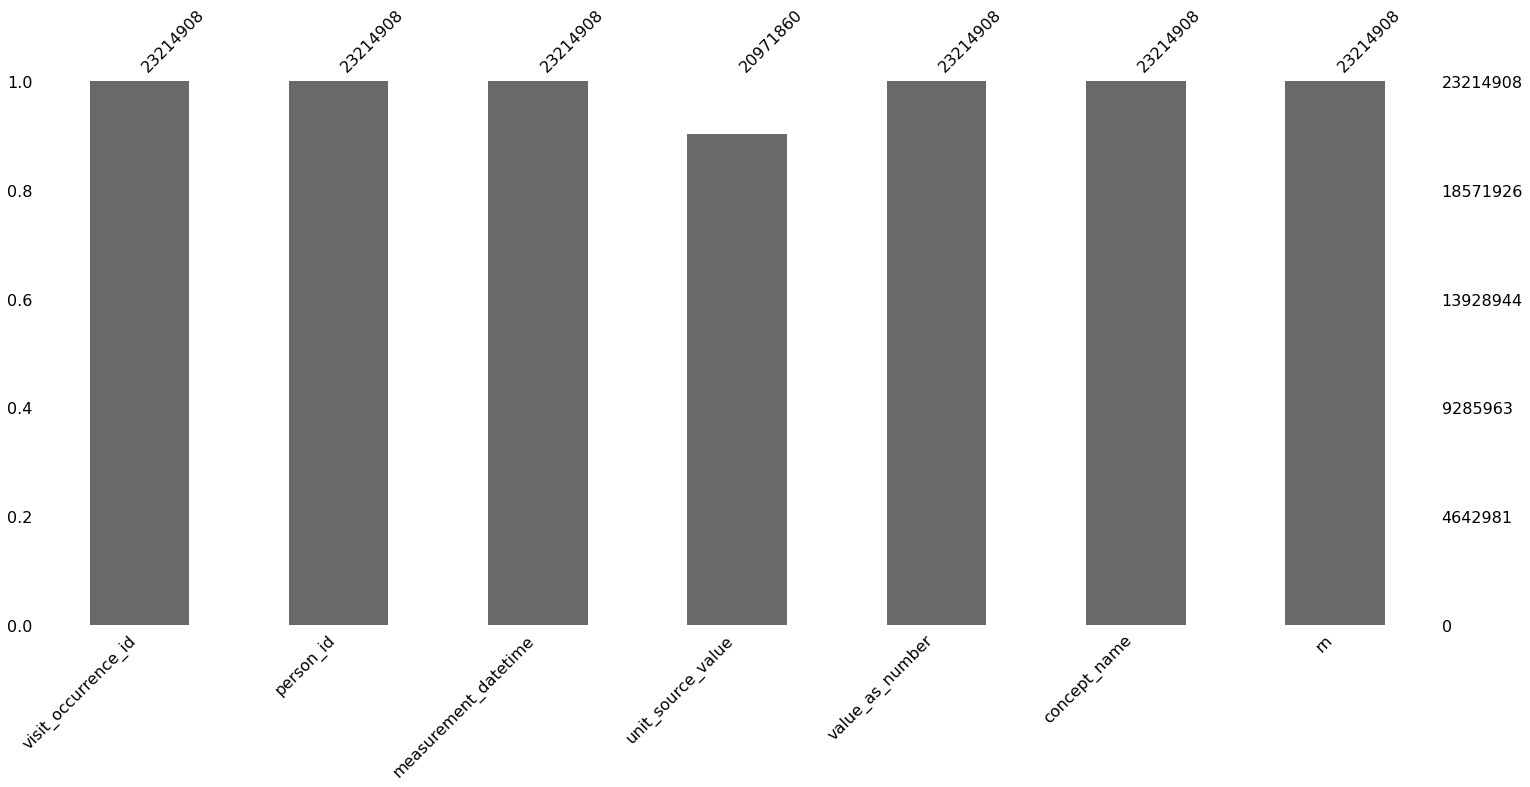

In [9]:
import missingno as msno

msno.bar(vitalsDf)

### Outliers

In [10]:
import numpy as np

def reject_outliers(df):
    data = df[df.value_as_number < vitalsValues.value_as_number.quantile(0.9999)].value_as_number
    inx = df.value_as_number.sub(data.mean()).div(data.std()).abs().le(3)
    return df[inx]

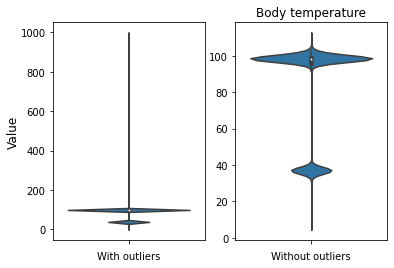

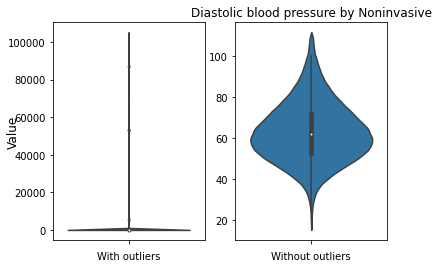

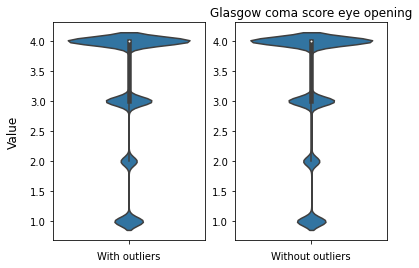

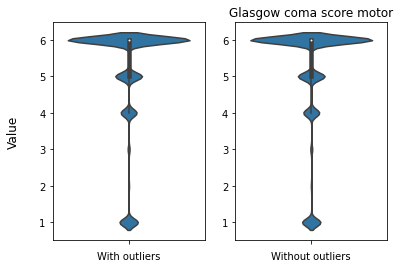

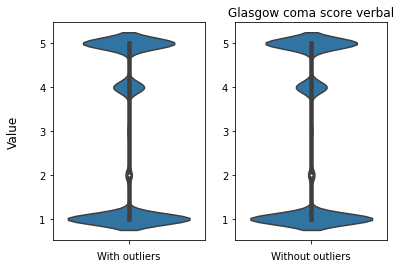

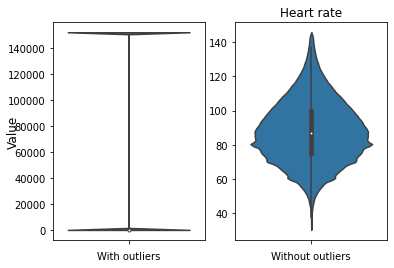

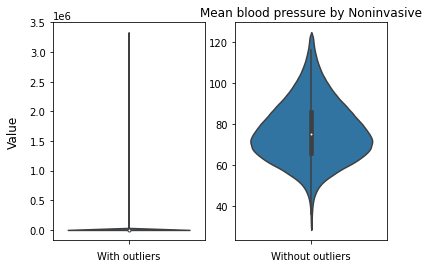

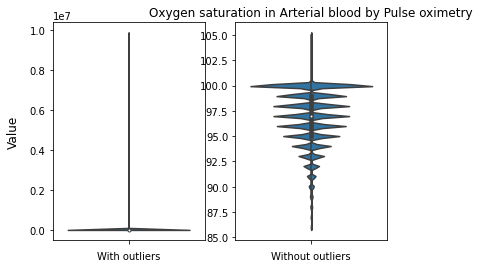

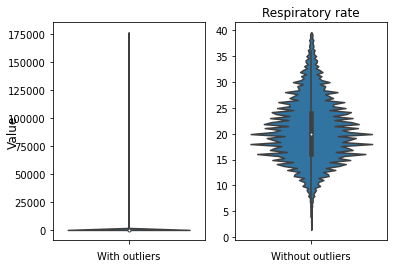

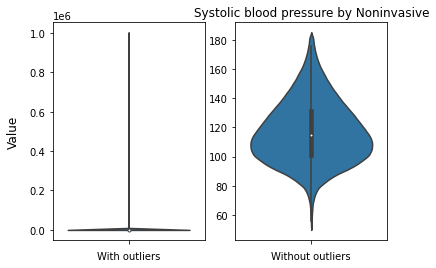

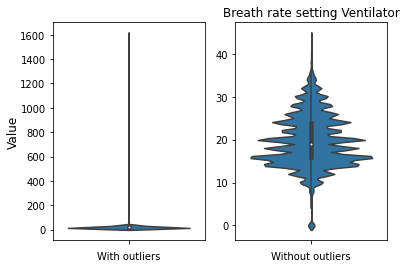

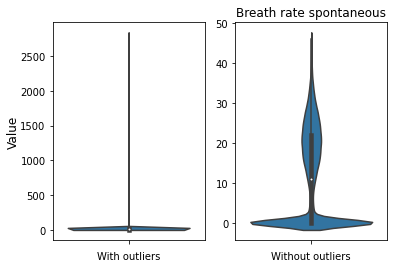

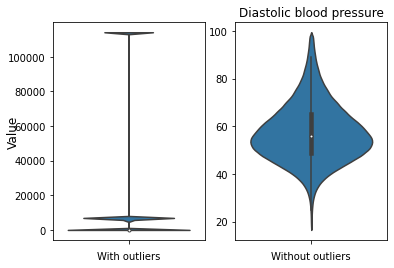

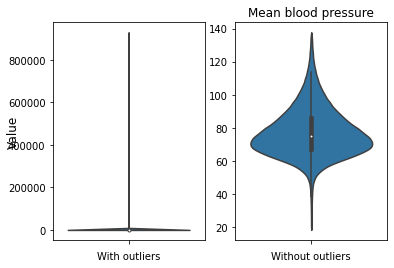

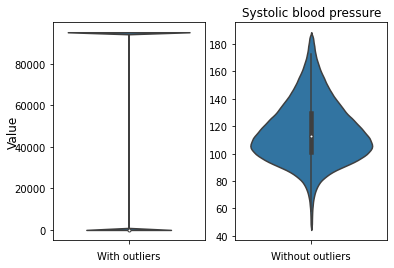

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

vitalsFilteredDf = pd.DataFrame(columns=vitalsDf.columns)

vitalsConcepts = vitalsDf.concept_name.unique()

for v in vitalsConcepts:

    vitalsValues = vitalsDf[vitalsDf.concept_name == v]
    vitalsValuesFiltered = reject_outliers(vitalsValues)

    vitalsFilteredDf = pd.concat([vitalsFilteredDf, vitalsValuesFiltered])

    fig, (ax1, ax2) = plt.subplots(1, 2)

    sns.violinplot(
        y = vitalsValues.value_as_number,
        ax=ax1
    )
    ax1.set_xlabel('With outliers')
    ax1.set_ylabel('')

    sns.violinplot(
        y = vitalsValuesFiltered.value_as_number,
        ax=ax2
    )
    ax2.set_xlabel('Without outliers')
    ax2.set_ylabel('')

    fig.supylabel('Value')
    plt.title(v)
    plt.show()

In [12]:
dropTableQuery = """drop table if exists sepsis_icd.vitals_filtered cascade;"""
createTableQuery = """create table sepsis_icd.vitals_filtered (like sepsis_icd.vitals including all)"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropTableQuery)
        cursor.execute(createTableQuery)

In [16]:
import psycopg2.extras

if len(vitalsFilteredDf) > 0:

    table = 'sepsis_icd.vitals_filtered'

    df_columns = list(vitalsFilteredDf)
    # create (col1,col2,...)
    columns = ",".join(df_columns)

    # create VALUES('%s', '%s",...) one '%s' per column
    values = "VALUES({})".format(",".join(["%s" for _ in df_columns])) 

    #create INSERT INTO table (columns) VALUES('%s',...)
    insert_stmt = "INSERT INTO {} ({}) {}".format(table,columns,values)

    cur = con.cursor()
    psycopg2.extras.execute_batch(cur, insert_stmt, vitalsFilteredDf.values)
    con.commit()
    cur.close()

## Laboratory Measurements

### Read data

In [17]:
labsQuery = """select * from sepsis_icd.labs;"""
labsDf = pd.read_sql_query(labsQuery, con)
labsDf

,visit_occurrence_id,person_id,measurement_datetime,unit_source_value,value_as_number,concept_name,rn
0,-914415209,-2146573171,2141-09-16 04:26:00,mEq/L,26.0,Bicarbonate [Moles/volume] in Serum or Plasma,1
1,-914415209,-2146573171,2141-09-16 04:26:00,mEq/L,108.0,Chloride [Moles/volume] in Serum or Plasma,1
2,-914415209,-2146573171,2141-09-16 04:26:00,mg/dL,0.7,Creatinine [Mass/volume] in Serum or Plasma,1
3,-914415209,-2146573171,2141-09-16 04:26:00,mg/dL,74.0,Glucose [Mass/volume] in Serum or Plasma,1
4,-914415209,-2146573171,2141-09-16 04:26:00,g/dl,9.3,Hemoglobin [Mass/volume] in Blood,1
...,...,...,...,...,...,...,...
1414251,741509696,2147343185,2113-08-21 03:55:00,mEq/L,141.0,Sodium [Moles/volume] in Serum or Plasma,1
1414252,741509696,2147343185,2113-08-21 08:19:00,mEq/L,139.0,Sodium [Moles/volume] in Serum or Plasma,2
1414253,741509696,2147343185,2113-08-21 16:30:00,mEq/L,137.0,Sodium [Moles/volume] in Serum or Plasma,3
1414254,741509696,2147343185,2113-08-22 01:34:00,mEq/L,136.0,Sodium [Moles/volume] in Serum or Plasma,4


### Missing data

<AxesSubplot:>

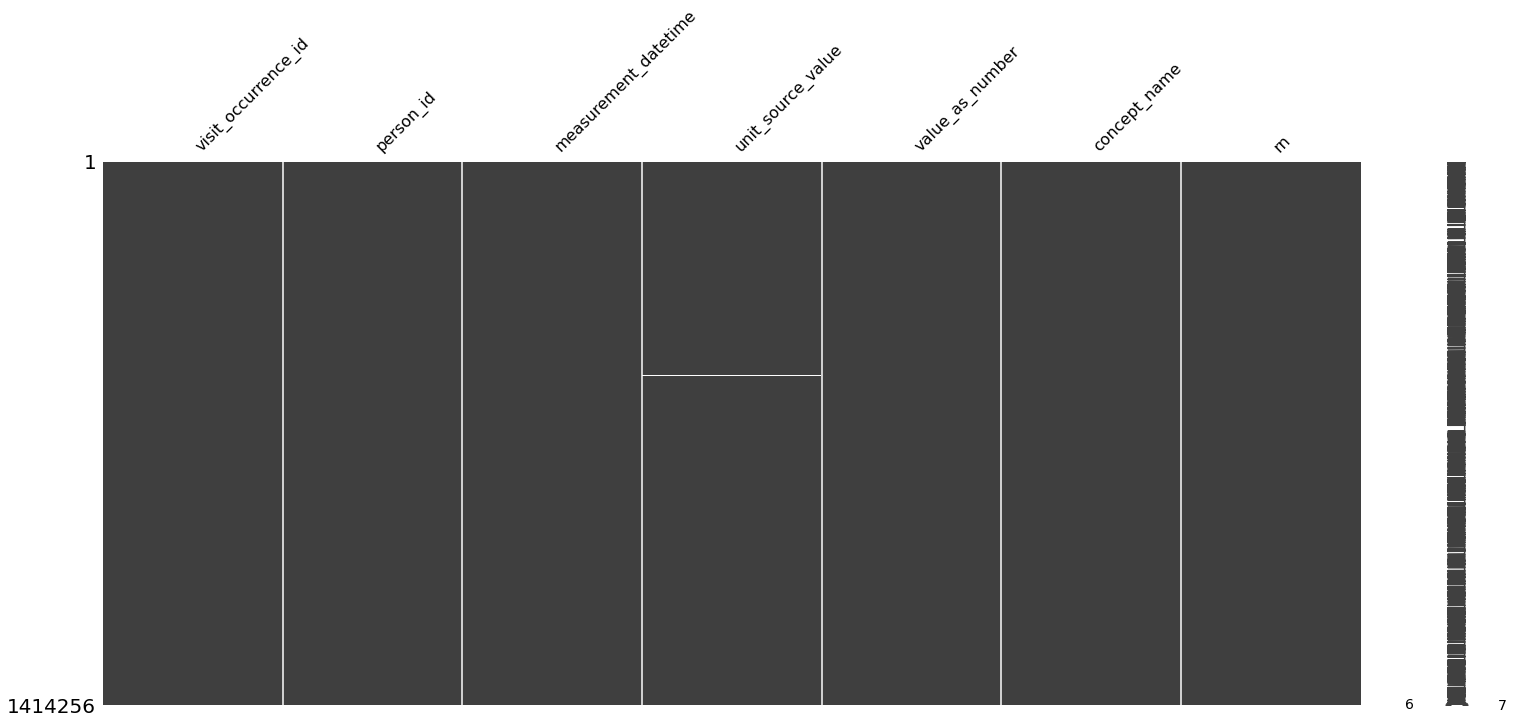

In [18]:
import missingno as msno

msno.matrix(labsDf)

<AxesSubplot:>

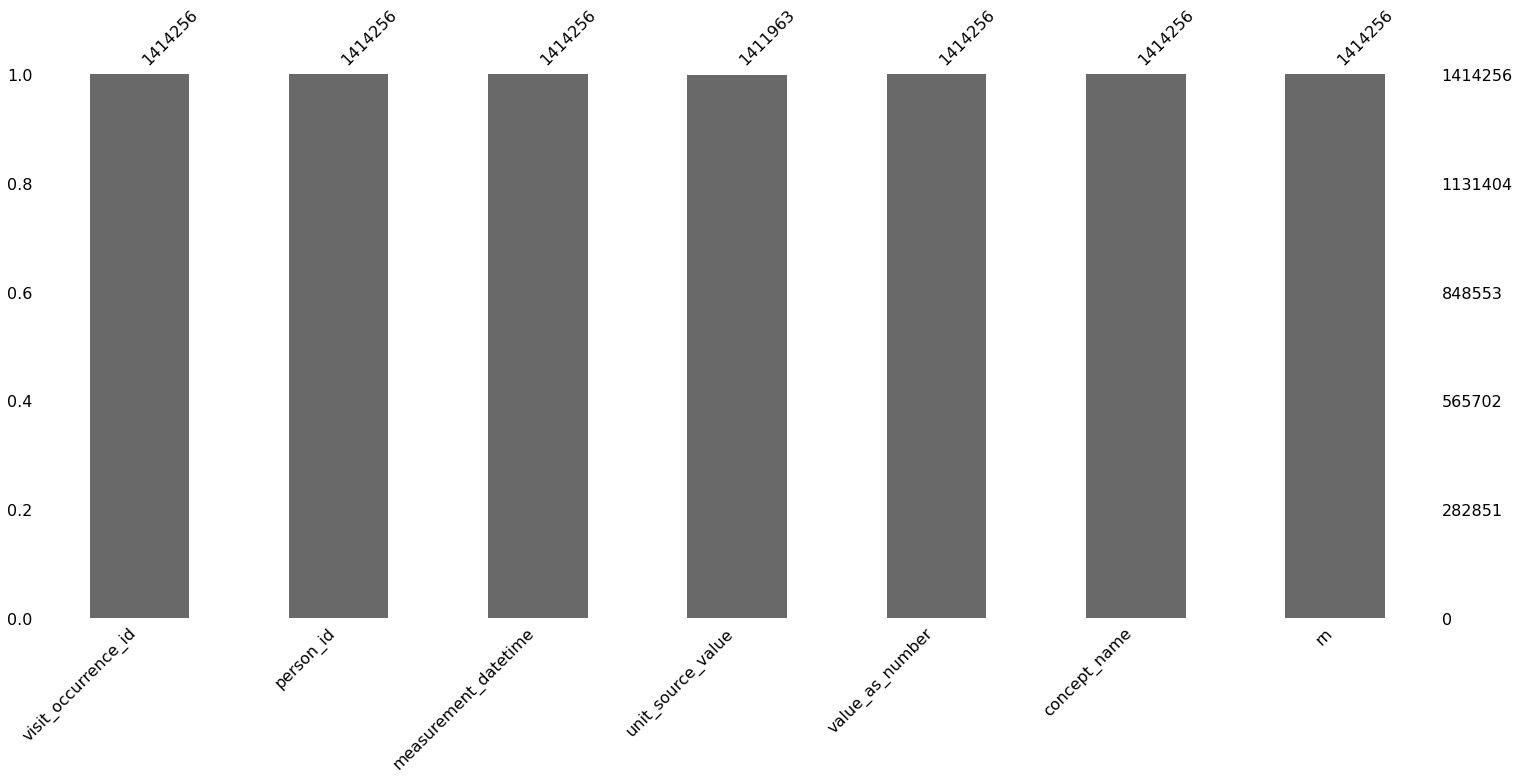

In [19]:
import missingno as msno

msno.bar(labsDf)

### Outliers

In [20]:
import numpy as np

def reject_outliers(df):
    data = df[df.value_as_number != 999999].value_as_number
    inx = df.value_as_number.sub(data.mean()).div(data.std()).abs().le(3)
    return df[inx]

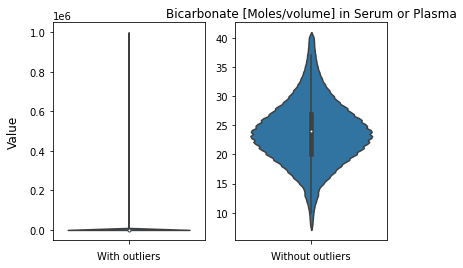

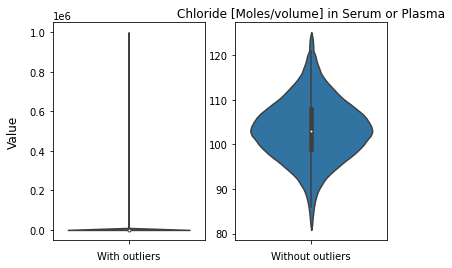

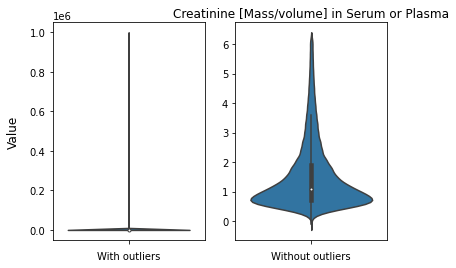

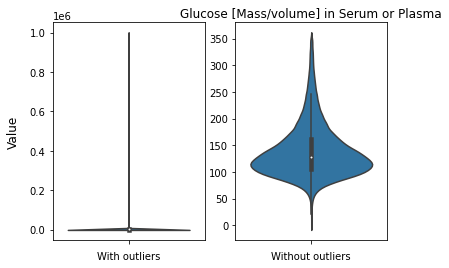

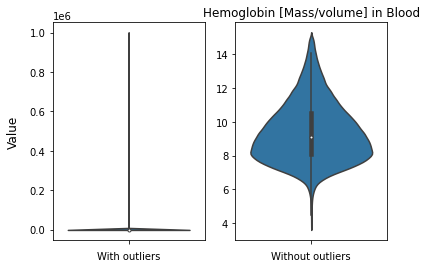

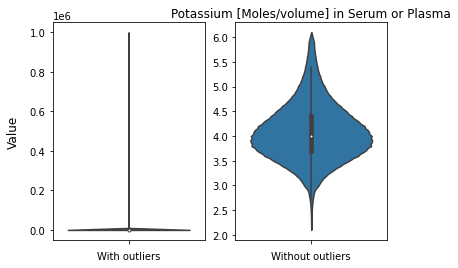

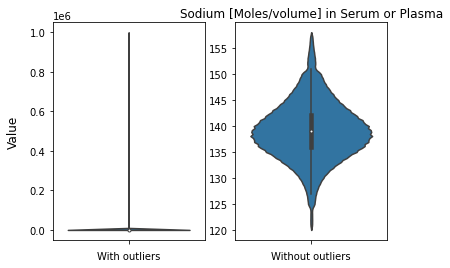

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

labsFilteredDf = pd.DataFrame(columns=labsDf.columns)

labConcepts = labsDf.concept_name.unique()

for v in labConcepts:

    labsValues = labsDf[labsDf.concept_name == v]
    labsValuesFiltered = reject_outliers(labsValues)

    labsFilteredDf = pd.concat([labsFilteredDf, labsValuesFiltered])

    fig, (ax1, ax2) = plt.subplots(1, 2)

    sns.violinplot(
        y = labsValues.value_as_number,
        ax=ax1
    )
    ax1.set_xlabel('With outliers')
    ax1.set_ylabel('')

    sns.violinplot(
        y = labsValuesFiltered.value_as_number,
        ax=ax2
    )
    ax2.set_xlabel('Without outliers')
    ax2.set_ylabel('')

    fig.supylabel('Value')
    plt.title(v)
    plt.show()

In [22]:
dropTableQuery = """drop table if exists sepsis_icd.labs_filtered cascade;"""
createTableQuery = """create table sepsis_icd.labs_filtered (like sepsis_icd.labs including all)"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropTableQuery)
        cursor.execute(createTableQuery)

In [24]:
if len(labsFilteredDf) > 0:

    table = 'sepsis_icd.labs_filtered'

    df_columns = list(labsFilteredDf)
    # create (col1,col2,...)
    columns = ",".join(df_columns)

    # create VALUES('%s', '%s",...) one '%s' per column
    values = "VALUES({})".format(",".join(["%s" for _ in df_columns])) 

    #create INSERT INTO table (columns) VALUES('%s',...)
    insert_stmt = "INSERT INTO {} ({}) {}".format(table,columns,values)

    cur = con.cursor()
    psycopg2.extras.execute_batch(cur, insert_stmt, labsFilteredDf.values)
    con.commit()
    cur.close()

## Combine data

In [25]:
dropVitalsStg1Query = """drop table if exists sepsis_icd.vitals_stg_1 cascade"""
dataVitals1Query = """
	create table sepsis_icd.vitals_stg_1 as
	select
	vit.visit_occurrence_id as visit_occurrence_id
	, vit.person_id as person_id
	, vit.rn as rn
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Body temperature' THEN vit.value_as_number ELSE null END)) AS tmp
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Heart rate' THEN vit.value_as_number ELSE null END)) AS heartrate
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Breath rate setting Ventilator' THEN vit.value_as_number ELSE null END)) AS breath_rate_vent
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Breath rate spontaneous' THEN vit.value_as_number ELSE null END)) AS breath_rate_spon
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Respiratory rate' THEN vit.value_as_number ELSE null END)) AS resp_rate
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Oxygen saturation in Arterial blood by Pulse oximetry' THEN vit.value_as_number ELSE null END)) AS oxygen
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Systolic blood pressure' THEN vit.value_as_number ELSE null END)) AS sysbp
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Diastolic blood pressure' THEN vit.value_as_number ELSE null END)) AS diabp
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Mean blood pressure' THEN vit.value_as_number ELSE null END)) AS meanbp
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Systolic blood pressure by Noninvasive' THEN vit.value_as_number ELSE null END)) AS sysbp_ni
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Diastolic blood pressure by Noninvasive' THEN vit.value_as_number ELSE null END)) AS diabp_ni
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Mean blood pressure by Noninvasive' THEN vit.value_as_number ELSE null END)) AS meanbp_ni
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Glasgow coma score motor' THEN vit.value_as_number ELSE null END)) AS gcs_motor
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Glasgow coma score verbal' THEN vit.value_as_number ELSE null END)) AS gcs_verbal
	, COALESCE(MAX(CASE WHEN vit.concept_name = 'Glasgow coma score eye opening' THEN vit.value_as_number ELSE null END)) AS gcs_eye
	from
	sepsis_icd.vitals_filtered vit
	group by vit.visit_occurrence_id, vit.person_id, vit.rn
	;
	"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropVitalsStg1Query)
        cursor.execute(dataVitals1Query)

In [26]:
dropVitalsMaxQuery = """drop table if exists sepsis_icd.vitals_max cascade"""
dataVitalsMaxQuery = """
	create table sepsis_icd.vitals_max as
    select
    distinct
    vit.visit_occurrence_id as visit_occurrence_id
    , vit.person_id as person_id
    , max(vit.tmp) over (partition by vit.visit_occurrence_id, vit.person_id) as temp_max
    , max(vit.heartrate) over (partition by vit.visit_occurrence_id, vit.person_id) as heartrate_max
    , max(vit.breath_rate_vent) over (partition by vit.visit_occurrence_id, vit.person_id) as breath_rate_vent_max
    , max(vit.breath_rate_spon) over (partition by vit.visit_occurrence_id, vit.person_id) as breath_rate_spon_max
    , max(vit.resp_rate) over (partition by vit.visit_occurrence_id, vit.person_id) as resp_rate_max
    , max(vit.oxygen) over (partition by vit.visit_occurrence_id, vit.person_id) as oxygen_max
    , max(vit.sysbp) over (partition by vit.visit_occurrence_id, vit.person_id) as sysbp_max
    , max(vit.diabp) over (partition by vit.visit_occurrence_id, vit.person_id) as diabp_max
    , max(vit.meanbp) over (partition by vit.visit_occurrence_id, vit.person_id) as meanbp_max
    , max(vit.sysbp_ni) over (partition by vit.visit_occurrence_id, vit.person_id) as sysbp_ni_max
    , max(vit.diabp_ni) over (partition by vit.visit_occurrence_id, vit.person_id) as diabp_ni_max
    , max(vit.meanbp_ni) over (partition by vit.visit_occurrence_id, vit.person_id) as meanbp_ni_max
    , max(vit.gcs_motor) over (partition by vit.visit_occurrence_id, vit.person_id) as gcs_motor_max
    , max(vit.gcs_verbal) over (partition by vit.visit_occurrence_id, vit.person_id) as gcs_verbal_max
    , max(vit.gcs_eye) over (partition by vit.visit_occurrence_id, vit.person_id) as gcs_eye_max
    from sepsis_icd.vitals_stg_1 vit
    ;
"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropVitalsMaxQuery)
        cursor.execute(dataVitalsMaxQuery)

In [27]:
dropVitalsMinQuery = """drop table if exists sepsis_icd.vitals_min cascade"""
dataVitalsMinQuery = """
	create table sepsis_icd.vitals_min as
    select
    distinct
    vit.visit_occurrence_id as visit_occurrence_id
    , vit.person_id as person_id
    , min(vit.tmp) over (partition by vit.visit_occurrence_id, vit.person_id) as temp_min
    , min(vit.heartrate) over (partition by vit.visit_occurrence_id, vit.person_id) as heartrate_min
    , min(vit.breath_rate_vent) over (partition by vit.visit_occurrence_id, vit.person_id) as breath_rate_vent_min
    , min(vit.breath_rate_spon) over (partition by vit.visit_occurrence_id, vit.person_id) as breath_rate_spon_min
    , min(vit.resp_rate) over (partition by vit.visit_occurrence_id, vit.person_id) as resp_rate_min
    , min(vit.oxygen) over (partition by vit.visit_occurrence_id, vit.person_id) as oxygen_min
    , min(vit.sysbp) over (partition by vit.visit_occurrence_id, vit.person_id) as sysbp_min
    , min(vit.diabp) over (partition by vit.visit_occurrence_id, vit.person_id) as diabp_min
    , min(vit.meanbp) over (partition by vit.visit_occurrence_id, vit.person_id) as meanbp_min
    , min(vit.sysbp_ni) over (partition by vit.visit_occurrence_id, vit.person_id) as sysbp_ni_min
    , min(vit.diabp_ni) over (partition by vit.visit_occurrence_id, vit.person_id) as diabp_ni_min
    , min(vit.meanbp_ni) over (partition by vit.visit_occurrence_id, vit.person_id) as meanbp_ni_min
    , min(vit.gcs_motor) over (partition by vit.visit_occurrence_id, vit.person_id) as gcs_motor_min
    , min(vit.gcs_verbal) over (partition by vit.visit_occurrence_id, vit.person_id) as gcs_verbal_min
    , min(vit.gcs_eye) over (partition by vit.visit_occurrence_id, vit.person_id) as gcs_eye_min
    from sepsis_icd.vitals_stg_1 vit
    ;
"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropVitalsMinQuery)
        cursor.execute(dataVitalsMinQuery)

In [28]:
dropVitalsAvgQuery = """drop table if exists sepsis_icd.vitals_avg cascade"""
dataVitalsAvgQuery = """
	create table sepsis_icd.vitals_avg as
    select
    distinct
    vit.visit_occurrence_id as visit_occurrence_id
    , vit.person_id as person_id
    , avg(vit.tmp) over (partition by vit.visit_occurrence_id, vit.person_id) as temp_avg
    , avg(vit.heartrate) over (partition by vit.visit_occurrence_id, vit.person_id) as heartrate_avg
    , avg(vit.breath_rate_vent) over (partition by vit.visit_occurrence_id, vit.person_id) as breath_rate_vent_avg
    , avg(vit.breath_rate_spon) over (partition by vit.visit_occurrence_id, vit.person_id) as breath_rate_spon_avg
    , avg(vit.resp_rate) over (partition by vit.visit_occurrence_id, vit.person_id) as resp_rate_avg
    , avg(vit.oxygen) over (partition by vit.visit_occurrence_id, vit.person_id) as oxygen_avg
    , avg(vit.sysbp) over (partition by vit.visit_occurrence_id, vit.person_id) as sysbp_avg
    , avg(vit.diabp) over (partition by vit.visit_occurrence_id, vit.person_id) as diabp_avg
    , avg(vit.meanbp) over (partition by vit.visit_occurrence_id, vit.person_id) as meanbp_avg
    , avg(vit.sysbp_ni) over (partition by vit.visit_occurrence_id, vit.person_id) as sysbp_ni_avg
    , avg(vit.diabp_ni) over (partition by vit.visit_occurrence_id, vit.person_id) as diabp_ni_avg
    , avg(vit.meanbp_ni) over (partition by vit.visit_occurrence_id, vit.person_id) as meanbp_ni_avg
    , avg(vit.gcs_motor) over (partition by vit.visit_occurrence_id, vit.person_id) as gcs_motor_avg
    , avg(vit.gcs_verbal) over (partition by vit.visit_occurrence_id, vit.person_id) as gcs_verbal_avg
    , avg(vit.gcs_eye) over (partition by vit.visit_occurrence_id, vit.person_id) as gcs_eye_avg
    from sepsis_icd.vitals_stg_1 vit
    ;
"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropVitalsAvgQuery)
        cursor.execute(dataVitalsAvgQuery)

In [29]:
dropVitalsStddevQuery = """drop table if exists sepsis_icd.vitals_stddev cascade"""
dataVitalsStddevQuery = """
	create table sepsis_icd.vitals_stddev as
    select
    distinct
    vit.visit_occurrence_id as visit_occurrence_id
    , vit.person_id as person_id
    , stddev(vit.tmp) over (partition by vit.visit_occurrence_id, vit.person_id) as temp_sd
    , stddev(vit.heartrate) over (partition by vit.visit_occurrence_id, vit.person_id) as heartrate_sd
    , stddev(vit.breath_rate_vent) over (partition by vit.visit_occurrence_id, vit.person_id) as breath_rate_vent_sd
    , stddev(vit.breath_rate_spon) over (partition by vit.visit_occurrence_id, vit.person_id) as breath_rate_spon_sd
    , stddev(vit.resp_rate) over (partition by vit.visit_occurrence_id, vit.person_id) as resp_rate_sd
    , stddev(vit.oxygen) over (partition by vit.visit_occurrence_id, vit.person_id) as oxygen_sd
    , stddev(vit.sysbp) over (partition by vit.visit_occurrence_id, vit.person_id) as sysbp_sd
    , stddev(vit.diabp) over (partition by vit.visit_occurrence_id, vit.person_id) as diabp_sd
    , stddev(vit.meanbp) over (partition by vit.visit_occurrence_id, vit.person_id) as meanbp_sd
    , stddev(vit.sysbp_ni) over (partition by vit.visit_occurrence_id, vit.person_id) as sysbp_ni_sd
    , stddev(vit.diabp_ni) over (partition by vit.visit_occurrence_id, vit.person_id) as diabp_ni_sd
    , stddev(vit.meanbp_ni) over (partition by vit.visit_occurrence_id, vit.person_id) as meanbp_ni_sd
    , stddev(vit.gcs_motor) over (partition by vit.visit_occurrence_id, vit.person_id) as gcs_motor_sd
    , stddev(vit.gcs_verbal) over (partition by vit.visit_occurrence_id, vit.person_id) as gcs_verbal_sd
    , stddev(vit.gcs_eye) over (partition by vit.visit_occurrence_id, vit.person_id) as gcs_eye_sd
    from sepsis_icd.vitals_stg_1 vit
    ;
"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropVitalsStddevQuery)
        cursor.execute(dataVitalsStddevQuery)

In [30]:
dropVitalsFirstQuery = """drop table if exists sepsis_icd.vitals_first cascade"""
dataVitalsFirstQuery = """
	create table sepsis_icd.vitals_first as
    select
    distinct
    vit.visit_occurrence_id as visit_occurrence_id
    , vit.person_id as person_id
    , first_value(vit.tmp) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.tmp is not null then 0 else 1 end asc, vit.rn asc) as temp_first
    , first_value(vit.heartrate) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.heartrate is not null then 0 else 1 end asc, vit.rn asc) as heartrate_first
    , first_value(vit.breath_rate_vent) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.breath_rate_vent is not null then 0 else 1 end asc, vit.rn asc) as breath_rate_vent_first
    , first_value(vit.breath_rate_spon) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.breath_rate_spon is not null then 0 else 1 end asc, vit.rn asc) as breath_rate_spon_first
    , first_value(vit.resp_rate) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.resp_rate is not null then 0 else 1 end asc, vit.rn asc) as resp_rate_first
    , first_value(vit.oxygen) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.oxygen is not null then 0 else 1 end asc, vit.rn asc) as oxygen_first
    , first_value(vit.sysbp) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.sysbp is not null then 0 else 1 end asc, vit.rn asc) as sysbp_first
    , first_value(vit.diabp) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.diabp is not null then 0 else 1 end asc, vit.rn asc) as diabp_first
    , first_value(vit.meanbp) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.meanbp is not null then 0 else 1 end asc, vit.rn asc) as meanbp_first
    , first_value(vit.sysbp_ni) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.sysbp_ni is not null then 0 else 1 end asc, vit.rn asc) as sysbp_ni_first
    , first_value(vit.diabp_ni) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.diabp_ni is not null then 0 else 1 end asc, vit.rn asc) as diabp_ni_first
    , first_value(vit.meanbp_ni) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.meanbp_ni is not null then 0 else 1 end asc, vit.rn asc) as meanbp_ni_first
    , first_value(vit.gcs_motor) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.gcs_motor is not null then 0 else 1 end asc, vit.rn asc) as gcs_motor_first
    , first_value(vit.gcs_verbal) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.gcs_verbal is not null then 0 else 1 end asc, vit.rn asc) as gcs_verbal_first
    , first_value(vit.gcs_eye) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.gcs_eye is not null then 0 else 1 end asc, vit.rn asc) as gcs_eye_first
    from sepsis_icd.vitals_stg_1 vit
    ;
"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropVitalsFirstQuery)
        cursor.execute(dataVitalsFirstQuery)

In [31]:
dropVitalsLastQuery = """drop table if exists sepsis_icd.vitals_last cascade"""
dataVitalsLastQuery = """
	create table sepsis_icd.vitals_last as
    select
    distinct
    vit.visit_occurrence_id as visit_occurrence_id
    , vit.person_id as person_id
    , first_value(vit.tmp) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.tmp is not null then 0 else 1 end asc, vit.rn desc) as temp_last
    , first_value(vit.heartrate) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.heartrate is not null then 0 else 1 end asc, vit.rn desc) as heartrate_last
    , first_value(vit.breath_rate_vent) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.breath_rate_vent is not null then 0 else 1 end asc, vit.rn desc) as breath_rate_vent_last
    , first_value(vit.breath_rate_spon) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.breath_rate_spon is not null then 0 else 1 end asc, vit.rn desc) as breath_rate_spon_last
    , first_value(vit.resp_rate) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.resp_rate is not null then 0 else 1 end asc, vit.rn desc) as resp_rate_last
    , first_value(vit.oxygen) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.oxygen is not null then 0 else 1 end asc, vit.rn desc) as oxygen_last
    , first_value(vit.sysbp) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.sysbp is not null then 0 else 1 end asc, vit.rn desc) as sysbp_last
    , first_value(vit.diabp) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.diabp is not null then 0 else 1 end asc, vit.rn desc) as diabp_last
    , first_value(vit.meanbp) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.meanbp is not null then 0 else 1 end asc, vit.rn desc) as meanbp_last
    , first_value(vit.sysbp_ni) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.sysbp_ni is not null then 0 else 1 end asc, vit.rn desc) as sysbp_ni_last
    , first_value(vit.diabp_ni) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.diabp_ni is not null then 0 else 1 end asc, vit.rn desc) as diabp_ni_last
    , first_value(vit.meanbp_ni) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.meanbp_ni is not null then 0 else 1 end asc, vit.rn desc) as meanbp_ni_last
    , first_value(vit.gcs_motor) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.gcs_motor is not null then 0 else 1 end asc, vit.rn desc) as gcs_motor_last
    , first_value(vit.gcs_verbal) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.gcs_verbal is not null then 0 else 1 end asc, vit.rn desc) as gcs_verbal_last
    , first_value(vit.gcs_eye) over (partition by vit.visit_occurrence_id, vit.person_id order by case when vit.gcs_eye is not null then 0 else 1 end asc, vit.rn desc) as gcs_eye_last
    from sepsis_icd.vitals_stg_1 vit
    ;
"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropVitalsLastQuery)
        cursor.execute(dataVitalsLastQuery)

In [32]:
dropLabsStg1Query = """drop table if exists sepsis_icd.labs_stg_1 cascade"""
dataLabs1Query = """
	create table sepsis_icd.labs_stg_1 as
	select
	lab.visit_occurrence_id as visit_occurrence_id
	, lab.person_id as person_id
	, lab.rn as rn
	, COALESCE(MAX(CASE WHEN lab.concept_name = 'Potassium [Moles/volume] in Serum or Plasma' THEN lab.value_as_number ELSE null END)) AS potassium
	, COALESCE(MAX(CASE WHEN lab.concept_name = 'Chloride [Moles/volume] in Serum or Plasma' THEN lab.value_as_number ELSE null END)) AS chloride
	, COALESCE(MAX(CASE WHEN lab.concept_name = 'Glucose [Mass/volume] in Serum or Plasma' THEN lab.value_as_number ELSE null END)) AS glucose
	, COALESCE(MAX(CASE WHEN lab.concept_name = 'Sodium [Moles/volume] in Serum or Plasma' THEN lab.value_as_number ELSE null END)) AS sodium
	, COALESCE(MAX(CASE WHEN lab.concept_name = 'Bicarbonate [Moles/volume] in Serum or Plasma' THEN lab.value_as_number ELSE null END)) AS bicarbonate
	, COALESCE(MAX(CASE WHEN lab.concept_name = 'Hemoglobin [Mass/volume] in Blood' THEN lab.value_as_number ELSE null END)) AS hemoglobin
	, COALESCE(MAX(CASE WHEN lab.concept_name = 'Creatinine [Mass/volume] in Serum or Plasma' THEN lab.value_as_number ELSE null END)) AS creatinine
	from
	sepsis_icd.labs_filtered lab
	group by lab.visit_occurrence_id, lab.person_id, lab.rn
	;
	"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropLabsStg1Query)
        cursor.execute(dataLabs1Query)

In [33]:
dropLabsMaxQuery = """drop table if exists sepsis_icd.labs_max cascade"""
dataLabsMaxQuery = """
	create table sepsis_icd.labs_max as
    select
    distinct
    lab.visit_occurrence_id as visit_occurrence_id
    , lab.person_id as person_id
    , max(lab.potassium) over (partition by lab.visit_occurrence_id, lab.person_id) as potassium_max
    , max(lab.chloride) over (partition by lab.visit_occurrence_id, lab.person_id) as chloride_max
    , max(lab.glucose) over (partition by lab.visit_occurrence_id, lab.person_id) as glucose_max
    , max(lab.sodium) over (partition by lab.visit_occurrence_id, lab.person_id) as sodium_max
    , max(lab.bicarbonate) over (partition by lab.visit_occurrence_id, lab.person_id) as bicarbonate_max
    , max(lab.hemoglobin) over (partition by lab.visit_occurrence_id, lab.person_id) as hemoglobin_max
    , max(lab.creatinine) over (partition by lab.visit_occurrence_id, lab.person_id) as creatinine_max
    from sepsis_icd.labs_stg_1 lab
    ;
"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropLabsMaxQuery)
        cursor.execute(dataLabsMaxQuery)

In [34]:
dropLabsMinQuery = """drop table if exists sepsis_icd.labs_min cascade"""
dataLabsMinQuery = """
	create table sepsis_icd.labs_min as
    select
    distinct
    lab.visit_occurrence_id as visit_occurrence_id
    , lab.person_id as person_id
    , min(lab.potassium) over (partition by lab.visit_occurrence_id, lab.person_id) as potassium_min
    , min(lab.chloride) over (partition by lab.visit_occurrence_id, lab.person_id) as chloride_min
    , min(lab.glucose) over (partition by lab.visit_occurrence_id, lab.person_id) as glucose_min
    , min(lab.sodium) over (partition by lab.visit_occurrence_id, lab.person_id) as sodium_min
    , min(lab.bicarbonate) over (partition by lab.visit_occurrence_id, lab.person_id) as bicarbonate_min
    , min(lab.hemoglobin) over (partition by lab.visit_occurrence_id, lab.person_id) as hemoglobin_min
    , min(lab.creatinine) over (partition by lab.visit_occurrence_id, lab.person_id) as creatinine_min
    from sepsis_icd.labs_stg_1 lab
    ;
"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropLabsMinQuery)
        cursor.execute(dataLabsMinQuery)

In [35]:
dropLabsAvgQuery = """drop table if exists sepsis_icd.labs_avg cascade"""
dataLabsAvgQuery = """
	create table sepsis_icd.labs_avg as
    select
    distinct
    lab.visit_occurrence_id as visit_occurrence_id
    , lab.person_id as person_id
    , avg(lab.potassium) over (partition by lab.visit_occurrence_id, lab.person_id) as potassium_avg
    , avg(lab.chloride) over (partition by lab.visit_occurrence_id, lab.person_id) as chloride_avg
    , avg(lab.glucose) over (partition by lab.visit_occurrence_id, lab.person_id) as glucose_avg
    , avg(lab.sodium) over (partition by lab.visit_occurrence_id, lab.person_id) as sodium_avg
    , avg(lab.bicarbonate) over (partition by lab.visit_occurrence_id, lab.person_id) as bicarbonate_avg
    , avg(lab.hemoglobin) over (partition by lab.visit_occurrence_id, lab.person_id) as hemoglobin_avg
    , avg(lab.creatinine) over (partition by lab.visit_occurrence_id, lab.person_id) as creatinine_avg
    from sepsis_icd.labs_stg_1 lab
    ;
"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropLabsAvgQuery)
        cursor.execute(dataLabsAvgQuery)

In [36]:
dropLabsSdQuery = """drop table if exists sepsis_icd.labs_stddev cascade"""
dataLabsSdQuery = """
	create table sepsis_icd.labs_stddev as
    select
    distinct
    lab.visit_occurrence_id as visit_occurrence_id
    , lab.person_id as person_id
    , stddev(lab.potassium) over (partition by lab.visit_occurrence_id, lab.person_id) as potassium_sd
    , stddev(lab.chloride) over (partition by lab.visit_occurrence_id, lab.person_id) as chloride_sd
    , stddev(lab.glucose) over (partition by lab.visit_occurrence_id, lab.person_id) as glucose_sd
    , stddev(lab.sodium) over (partition by lab.visit_occurrence_id, lab.person_id) as sodium_sd
    , stddev(lab.bicarbonate) over (partition by lab.visit_occurrence_id, lab.person_id) as bicarbonate_sd
    , stddev(lab.hemoglobin) over (partition by lab.visit_occurrence_id, lab.person_id) as hemoglobin_sd
    , stddev(lab.creatinine) over (partition by lab.visit_occurrence_id, lab.person_id) as creatinine_sd
    from sepsis_icd.labs_stg_1 lab
    ;
"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropLabsSdQuery)
        cursor.execute(dataLabsSdQuery)

In [37]:
dropLabsFirstQuery = """drop table if exists sepsis_icd.labs_first cascade"""
dataLabsFirstQuery = """
	create table sepsis_icd.labs_first as
    select
    distinct
    lab.visit_occurrence_id as visit_occurrence_id
    , lab.person_id as person_id
    , first_value(lab.potassium) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.potassium is not null then 0 else 1 end asc, lab.rn asc) as potassium_first
    , first_value(lab.chloride) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.chloride is not null then 0 else 1 end asc, lab.rn asc) as chloride_first
    , first_value(lab.glucose) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.glucose is not null then 0 else 1 end asc, lab.rn asc) as glucose_first
    , first_value(lab.sodium) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.sodium is not null then 0 else 1 end asc, lab.rn asc) as sodium_first
    , first_value(lab.bicarbonate) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.bicarbonate is not null then 0 else 1 end asc, lab.rn asc) as bicarbonate_first
    , first_value(lab.hemoglobin) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.hemoglobin is not null then 0 else 1 end asc, lab.rn asc) as hemoglobin_first
    , first_value(lab.creatinine) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.creatinine is not null then 0 else 1 end asc, lab.rn asc) as creatinine_first
    from sepsis_icd.labs_stg_1 lab
    ;
"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropLabsFirstQuery)
        cursor.execute(dataLabsFirstQuery)

In [38]:
dropLabsLastQuery = """drop table if exists sepsis_icd.labs_last cascade"""
dataLabsLastQuery = """
	create table sepsis_icd.labs_last as
    select
    distinct
    lab.visit_occurrence_id as visit_occurrence_id
    , lab.person_id as person_id
    , first_value(lab.potassium) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.potassium is not null then 0 else 1 end asc, lab.rn desc) as potassium_last
    , first_value(lab.chloride) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.chloride is not null then 0 else 1 end asc, lab.rn desc) as chloride_last
    , first_value(lab.glucose) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.glucose is not null then 0 else 1 end asc, lab.rn desc) as glucose_last
    , first_value(lab.sodium) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.sodium is not null then 0 else 1 end asc, lab.rn desc) as sodium_last
    , first_value(lab.bicarbonate) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.bicarbonate is not null then 0 else 1 end asc, lab.rn desc) as bicarbonate_last
    , first_value(lab.hemoglobin) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.hemoglobin is not null then 0 else 1 end asc, lab.rn desc) as hemoglobin_last
    , first_value(lab.creatinine) over (partition by lab.visit_occurrence_id, lab.person_id order by case when lab.creatinine is not null then 0 else 1 end asc, lab.rn desc) as creatinine_last
    from sepsis_icd.labs_stg_1 lab
    ;
"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropLabsLastQuery)
        cursor.execute(dataLabsLastQuery)

In [ ]:
dropDataMatrixQuery = """drop table if exists sepsis_icd.data_matrix_2 cascade"""
dataDataMatrixQuery = """
	create table sepsis_icd.data_matrix_2 as
    select
    sta."visit_occurrence_id"
    , sta."person_id"
    , sta."visit_occurrence_concept_name"
    , sta."visit_duration_hrs"
    , sta."visit_source_concept_name"
    , sta."admitting_source_value"
    , vit_max."temp_max"
    , vit_max."heartrate_max"
    , vit_max."breath_rate_vent_max"
    , vit_max."breath_rate_spon_max"
    , vit_max."resp_rate_max"
    , vit_max."oxygen_max"
    , vit_max."sysbp_max"
    , vit_max."diabp_max"
    , vit_max."meanbp_max"
    , vit_max."sysbp_ni_max"
    , vit_max."diabp_ni_max"
    , vit_max."meanbp_ni_max"
    , vit_max."gcs_motor_max"
    , vit_max."gcs_verbal_max"
    , vit_max."gcs_eye_max"
    , vit_min."temp_min"
    , vit_min."heartrate_min"
    , vit_min."breath_rate_vent_min"
    , vit_min."breath_rate_spon_min"
    , vit_min."resp_rate_min"
    , vit_min."oxygen_min"
    , vit_min."sysbp_min"
    , vit_min."diabp_min"
    , vit_min."meanbp_min"
    , vit_min."sysbp_ni_min"
    , vit_min."diabp_ni_min"
    , vit_min."meanbp_ni_min"
    , vit_min."gcs_motor_min"
    , vit_min."gcs_verbal_min"
    , vit_min."gcs_eye_min"
    , vit_avg."temp_avg"
    , vit_avg."heartrate_avg"
    , vit_avg."breath_rate_vent_avg"
    , vit_avg."breath_rate_spon_avg"
    , vit_avg."resp_rate_avg"
    , vit_avg."oxygen_avg"
    , vit_avg."sysbp_avg"
    , vit_avg."diabp_avg"
    , vit_avg."meanbp_avg"
    , vit_avg."sysbp_ni_avg"
    , vit_avg."diabp_ni_avg"
    , vit_avg."meanbp_ni_avg"
    , vit_avg."gcs_motor_avg"
    , vit_avg."gcs_verbal_avg"
    , vit_avg."gcs_eye_avg"
    , vit_stddev."temp_sd"
    , vit_stddev."heartrate_sd"
    , vit_stddev."breath_rate_vent_sd"
    , vit_stddev."breath_rate_spon_sd"
    , vit_stddev."resp_rate_sd"
    , vit_stddev."oxygen_sd"
    , vit_stddev."sysbp_sd"
    , vit_stddev."diabp_sd"
    , vit_stddev."meanbp_sd"
    , vit_stddev."sysbp_ni_sd"
    , vit_stddev."diabp_ni_sd"
    , vit_stddev."meanbp_ni_sd"
    , vit_stddev."gcs_motor_sd"
    , vit_stddev."gcs_verbal_sd"
    , vit_stddev."gcs_eye_sd"
    , vit_first."temp_first"
    , vit_first."heartrate_first"
    , vit_first."breath_rate_vent_first"
    , vit_first."breath_rate_spon_first"
    , vit_first."resp_rate_first"
    , vit_first."oxygen_first"
    , vit_first."sysbp_first"
    , vit_first."diabp_first"
    , vit_first."meanbp_first"
    , vit_first."sysbp_ni_first"
    , vit_first."diabp_ni_first"
    , vit_first."meanbp_ni_first"
    , vit_first."gcs_motor_first"
    , vit_first."gcs_verbal_first"
    , vit_first."gcs_eye_first"
    , vit_last."temp_last"
    , vit_last."heartrate_last"
    , vit_last."breath_rate_vent_last"
    , vit_last."breath_rate_spon_last"
    , vit_last."resp_rate_last"
    , vit_last."oxygen_last"
    , vit_last."sysbp_last"
    , vit_last."diabp_last"
    , vit_last."meanbp_last"
    , vit_last."sysbp_ni_last"
    , vit_last."diabp_ni_last"
    , vit_last."meanbp_ni_last"
    , vit_last."gcs_motor_last"
    , vit_last."gcs_verbal_last"
    , vit_last."gcs_eye_last"
    , lab_max."potassium_max"
    , lab_max."chloride_max"
    , lab_max."glucose_max"
    , lab_max."sodium_max"
    , lab_max."bicarbonate_max"
    , lab_max."hemoglobin_max"
    , lab_max."creatinine_max"
    , lab_min."potassium_min"
    , lab_min."chloride_min"
    , lab_min."glucose_min"
    , lab_min."sodium_min"
    , lab_min."bicarbonate_min"
    , lab_min."hemoglobin_min"
    , lab_min."creatinine_min"
    , lab_avg."potassium_avg"
    , lab_avg."chloride_avg"
    , lab_avg."glucose_avg"
    , lab_avg."sodium_avg"
    , lab_avg."bicarbonate_avg"
    , lab_avg."hemoglobin_avg"
    , lab_avg."creatinine_avg"
    , lab_stddev."potassium_sd"
    , lab_stddev."chloride_sd"
    , lab_stddev."glucose_sd"
    , lab_stddev."sodium_sd"
    , lab_stddev."bicarbonate_sd"
    , lab_stddev."hemoglobin_sd"
    , lab_stddev."creatinine_sd"
    , lab_first."potassium_first"
    , lab_first."chloride_first"
    , lab_first."glucose_first"
    , lab_first."sodium_first"
    , lab_first."bicarbonate_first"
    , lab_first."hemoglobin_first"
    , lab_first."creatinine_first"
    , lab_last."potassium_last"
    , lab_last."chloride_last"
    , lab_last."glucose_last"
    , lab_last."sodium_last"
    , lab_last."bicarbonate_last"
    , lab_last."hemoglobin_last"
    , lab_last."creatinine_last"
    , mor."discharge_mortality"
    , mor."one_day_mortality"
    , mor."two_day_mortality"
    , mor."thirty_day_mortality"
    , mor."sixty_day_mortality"
    , mor."ninety_day_mortality"
    , coh."sepsis"
    from
    sepsis_icd.cohort coh
    inner join sepsis_icd.static sta
    on sta.visit_occurrence_id = coh.visit_occurrence_id
    inner join sepsis_icd.vitals_max vit_max
    on vit_max.visit_occurrence_id = coh.visit_occurrence_id
    inner join sepsis_icd.vitals_min vit_min
    on vit_min.visit_occurrence_id = coh.visit_occurrence_id
    inner join sepsis_icd.vitals_avg vit_avg
    on vit_avg.visit_occurrence_id = coh.visit_occurrence_id
    inner join sepsis_icd.vitals_stddev vit_stddev
    on vit_stddev.visit_occurrence_id = coh.visit_occurrence_id
    inner join sepsis_icd.vitals_first vit_first
    on vit_first.visit_occurrence_id = coh.visit_occurrence_id
    inner join sepsis_icd.vitals_last vit_last
    on vit_last.visit_occurrence_id = coh.visit_occurrence_id
    inner join sepsis_icd.labs_max lab_max
    on lab_max.visit_occurrence_id = coh.visit_occurrence_id
    inner join sepsis_icd.labs_min lab_min
    on lab_min.visit_occurrence_id = coh.visit_occurrence_id
    inner join sepsis_icd.labs_avg lab_avg
    on lab_avg.visit_occurrence_id = coh.visit_occurrence_id
    inner join sepsis_icd.labs_stddev lab_stddev
    on lab_stddev.visit_occurrence_id = coh.visit_occurrence_id
    inner join sepsis_icd.labs_first lab_first
    on lab_first.visit_occurrence_id = coh.visit_occurrence_id
    inner join sepsis_icd.labs_last lab_last
    on lab_last.visit_occurrence_id = coh.visit_occurrence_id
    inner join sepsis_icd.mortality mor
    on mor.visit_occurrence_id = coh.visit_occurrence_id
    ;
"""

with con:
    with con.cursor() as cursor:
        cursor.execute(dropDataMatrixQuery)
        cursor.execute(dataDataMatrixQuery)